In [2]:
import numpy  as np
import pandas as pd

In [10]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\steam.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [12]:
df=df.drop(['appid','english','required_age','achievements'],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              27075 non-null  object 
 1   release_date      27075 non-null  object 
 2   developer         27075 non-null  object 
 3   publisher         27075 non-null  object 
 4   platforms         27075 non-null  object 
 5   categories        27075 non-null  object 
 6   genres            27075 non-null  object 
 7   steamspy_tags     27075 non-null  object 
 8   positive_ratings  27075 non-null  int64  
 9   negative_ratings  27075 non-null  int64  
 10  average_playtime  27075 non-null  int64  
 11  median_playtime   27075 non-null  int64  
 12  owners            27075 non-null  object 
 13  price             27075 non-null  float64
dtypes: float64(1), int64(4), object(9)
memory usage: 2.9+ MB


In [15]:
df['cts'] = df['genres'].str.split(';')

In [16]:
df['cts']

0                          [Action]
1                          [Action]
2                          [Action]
3                          [Action]
4                          [Action]
                    ...            
27070    [Adventure, Casual, Indie]
27071    [Action, Adventure, Indie]
27072       [Action, Casual, Indie]
27073    [Adventure, Casual, Indie]
27074    [Adventure, Casual, Indie]
Name: cts, Length: 27075, dtype: object

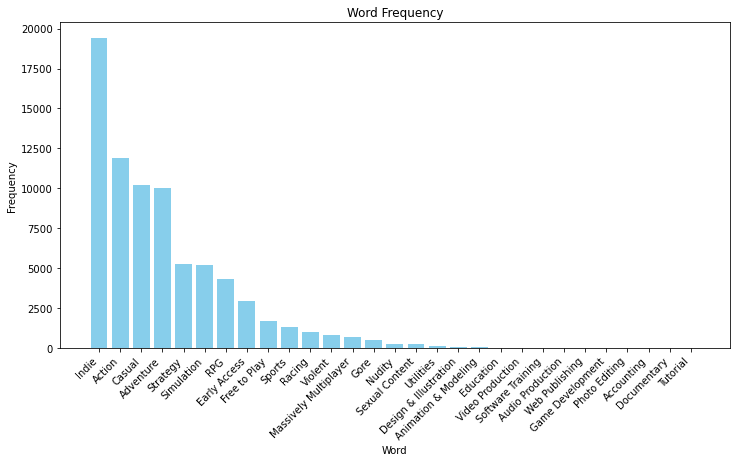

In [21]:
from collections import Counter
import matplotlib.pyplot as plt
all_words = [word for sublist in df['cts'] for word in sublist]

word_freq = Counter(all_words)

freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

freq_df = freq_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

word_freq_df.to_csv('word_frequency.csv', index=False)

In [37]:
df['tags'] = df['steamspy_tags'].str.split(';')

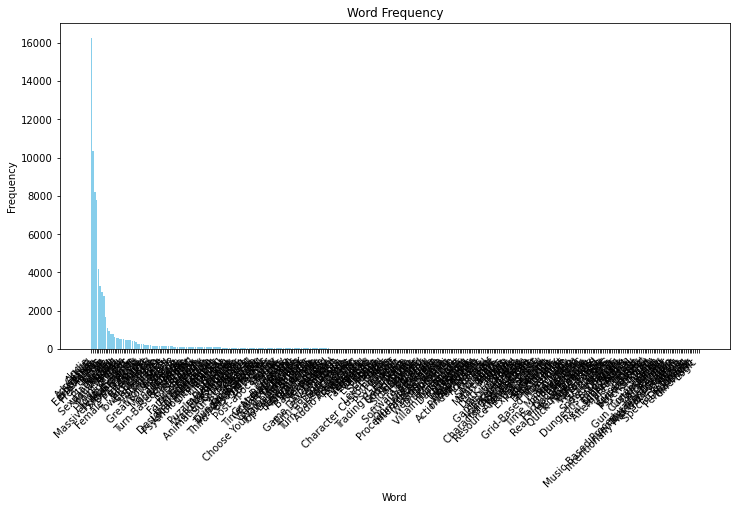

In [38]:
all_words = [word for sublist in df['tags'] for word in sublist]

word_freq = Counter(all_words)

freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

freq_df = freq_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

word_freq_df.to_csv('tag_frequency.csv', index=False)